In [1]:
import pandas as pd
import numpy as np
import talib as ta
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# 데이터 불러오기
df = pd.read_csv('bitcoin_data.csv')
df.dropna(inplace=True)

# 이동평균 계산
df['ADX'] = ta.ADX(df['high'], df['low'], df['close'])
df.dropna(inplace=True)

# 입력 데이터와 타겟 값 생성
X = df[['ADX']].values
Y = df['close'].values

# 데이터 스케일링
scaler = MinMaxScaler()

# 학습 데이터와 테스트 데이터 분할
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.2, shuffle=False,
                                                    random_state=0)

# X 학습 테스트
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Y 학습 테스트
Y_train = scaler.fit_transform(Y_train.reshape(-1, 1)).flatten()
Y_test = scaler.fit_transform(Y_test.reshape(-1, 1)).flatten()

# 전체 비교용 X Y
X_scaled = scaler.fit_transform(X)
Y_scaled = scaler.fit_transform(Y.reshape(-1, 1)).flatten()

# 모델 구축
model = LinearRegression()

# 모델 학습
model.fit(X_train, Y_train)

# 테스트 데이터 예측
Y_pred = model.predict(X_test)
Y_pred_all = model.predict(X_scaled)

# 예측 결과 역스케일링
Y_pred_scaled = scaler.inverse_transform(Y_pred.reshape(-1, 1)).flatten()
Y_pred_scaled_all = scaler.inverse_transform(Y_pred_all.reshape(-1, 1)).flatten()
Y_test_scaled = scaler.inverse_transform(Y_scaled.reshape(-1, 1)).flatten()

print(Y_pred_scaled)

[24591143.51801596 24683157.32840058 24717619.56971784 24650262.56636198
 24436293.25958234 24213403.41287153 23996090.59559547 23798432.64387525
 23612575.95790661 23403868.4928715  23207609.80749453 23044926.44535314
 22957198.44766788 22865231.6214874  22807033.27614594 22787312.79364015
 22776656.05125191 22798772.60886798 22798859.98725406 22788203.5677073
 22768247.77513203 22708809.80945152 22702550.02609136 22696737.37011407
 22685007.57517757 22746781.20484105 22872363.43691098 22988975.50954735
 23208652.94758007 23467850.94203239 23708534.79402383 23879576.30288127
 23988402.80416385 24046389.82373747 24076096.70200498 24170557.18664229
 24292115.96911142 24445026.50587979 24594745.44046658 24702808.77039796
 24717157.47523341 24691441.75702101 24711308.75221467 24711040.90455237
 24767731.97715822 24820373.68743508 24951194.83790461 25055739.28277436
 25105924.29030396 25097599.89468899 25070248.35336594 25021341.68932304
 25013565.37774085 25032613.51210286 25062478.680161

In [3]:
r2_train = r2_score(Y_train, model.predict(X_train))
r2_test = r2_score(Y_test, model.predict(X_test))

print(f"[r2_score] train : {r2_train} / test : {r2_test}")

# mse
mse = mean_squared_error(Y_test, Y_pred)
# rmse
rmse = np.sqrt(mse)

print(f'[MSE] : {mse:.3f}\n[RMSE] : {rmse:.3f}')

[r2_score] train : 0.003334253429696399 / test : -0.12388834548928429
[MSE] : 0.052
[RMSE] : 0.227


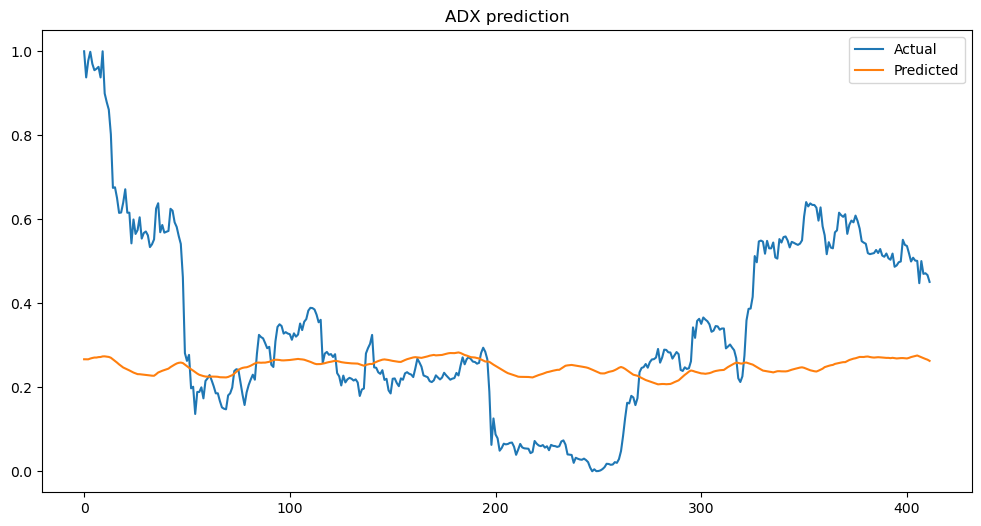

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(Y_test, label='Actual')
plt.plot(Y_pred, label='Predicted')
plt.title('ADX prediction')
plt.legend()
plt.show()